In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Подключили все библиотеки

Далее загружаем данные

In [5]:
data = pd.read_csv('Shanghai_HMT_2010.csv')

In [6]:
print(data.shape)

(52584, 17)


In [7]:
data = data.dropna()

In [8]:
print(data.shape)

(21436, 17)


In [9]:
data.head(17)

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
26304,26305,2013,1,1,0,4,66.0,70.0,71.0,-5.0,69.00,1023.0,0.0,SW,60.0,0.0,0.0
26305,26306,2013,1,1,1,4,67.0,76.0,72.0,-5.0,69.00,1023.0,0.0,SW,62.0,0.0,0.0
26307,26308,2013,1,1,3,4,73.0,78.0,74.0,-4.0,74.41,1023.0,0.0,SW,65.0,0.0,0.0
26308,26309,2013,1,1,4,4,75.0,77.0,77.0,-4.0,80.04,1023.0,-1.0,SW,68.0,0.0,0.0
26309,26310,2013,1,1,5,4,73.0,78.0,80.0,-4.0,80.04,1023.0,-1.0,SW,70.0,0.0,0.0
26310,26311,2013,1,1,6,4,74.0,77.0,77.0,-4.0,80.04,1023.0,-1.0,SW,71.0,0.0,0.0
26311,26312,2013,1,1,7,4,73.0,80.0,84.0,-4.0,86.15,1024.0,-2.0,cv,0.0,0.0,0.0
26312,26313,2013,1,1,8,4,77.0,76.0,87.0,-5.0,79.89,1024.0,-2.0,cv,1.0,0.0,0.0
26313,26314,2013,1,1,9,4,73.0,74.0,91.0,-3.0,60.25,1025.0,4.0,SW,4.0,0.0,0.0
26314,26315,2013,1,1,10,4,82.0,76.0,88.0,-4.0,48.63,1025.0,6.0,SW,8.0,0.0,0.0


Нас интересует давление - стоблец PRES.
Логично предположить, что наибольшая корреляция будет с TEMP и HUMI. Другие параметры тоже могут помочь в определении давления. Слабая зависимость может быть от даты. Искать корелляции с номером расчета или годом смысла не имеет.
Построим тепловую карту

<AxesSubplot:>

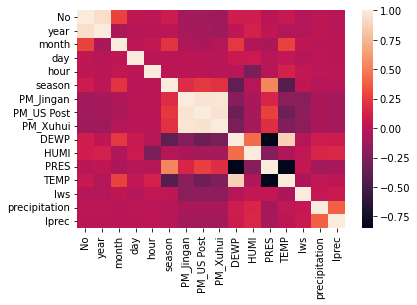

In [10]:
list_of_column_names = data.columns
sns.heatmap(data[list_of_column_names].corr(method="pearson"))

С нормализацией:

In [11]:
data -= data.mean()
data /= data.std()

C:\Users\user\AppData\Local\Temp/ipykernel_11732/2004711427.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data -= data.mean()


In [12]:
data.head(17)

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
26304,-1.747421,-1.207702,-1.557791,-1.676535,-1.754596,1.347979,0.166925,0.366599,0.252477,-1.704071,0.018112,0.774887,-1.961308,NaN,0.173173,-0.129194,-0.128254
26305,-1.747285,-1.207702,-1.557791,-1.676535,-1.606006,1.347979,0.187698,0.505240,0.272791,-1.704071,0.018112,0.774887,-1.961308,NaN,0.202715,-0.129194,-0.128254
26307,-1.747014,-1.207702,-1.557791,-1.676535,-1.308825,1.347979,0.312340,0.551454,0.313421,-1.598843,0.317001,0.774887,-1.961308,NaN,0.247030,-0.129194,-0.128254
26308,-1.746878,-1.207702,-1.557791,-1.676535,-1.160234,1.347979,0.353887,0.528347,0.374365,-1.598843,0.628044,0.774887,-2.072632,NaN,0.291344,-0.129194,-0.128254
26309,-1.746743,-1.207702,-1.557791,-1.676535,-1.011644,1.347979,0.312340,0.551454,0.435309,-1.598843,0.628044,0.774887,-2.072632,NaN,0.320887,-0.129194,-0.128254
26310,-1.746607,-1.207702,-1.557791,-1.676535,-0.863053,1.347979,0.333113,0.528347,0.374365,-1.598843,0.628044,0.774887,-2.072632,NaN,0.335658,-0.129194,-0.128254
26311,-1.746472,-1.207702,-1.557791,-1.676535,-0.714463,1.347979,0.312340,0.597668,0.516567,-1.598843,0.965606,0.886541,-2.183956,NaN,-0.713111,-0.129194,-0.128254
26312,-1.746336,-1.207702,-1.557791,-1.676535,-0.565872,1.347979,0.395434,0.505240,0.577511,-1.704071,0.619757,0.886541,-2.183956,NaN,-0.698340,-0.129194,-0.128254
26313,-1.746200,-1.207702,-1.557791,-1.676535,-0.417282,1.347979,0.312340,0.459026,0.658770,-1.493614,-0.465303,0.998194,-1.516012,NaN,-0.654026,-0.129194,-0.128254
26314,-1.746065,-1.207702,-1.557791,-1.676535,-0.268691,1.347979,0.499301,0.505240,0.597826,-1.598843,-1.107278,0.998194,-1.293365,NaN,-0.594940,-0.129194,-0.128254


В строках cbwd не числа, как трактовать не ясно, считаем что мусор. (направление ветра)

<AxesSubplot:>

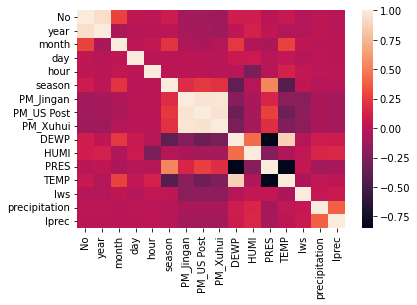

In [13]:
list_of_column_names = data.columns
sns.heatmap(data[list_of_column_names].corr(method="pearson"))

Пока попробуем в лоб предсказать давление по температуре и точке росы (DEWP). С остальными признаками корелляция слабая.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data[['TEMP','DEWP']], data['PRES'], test_size=0.33)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, explained_variance_score

In [20]:
model = LinearRegression(normalize=True)

In [21]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [22]:
predictions, y_test

(array([-0.73373247,  1.34699076,  0.36799652, ...,  1.15301187,
         1.05602242,  0.63321957]),
 41386   -0.229995
 45337    1.221501
 44947    0.328273
 45331    1.221501
 44485    1.333155
            ...   
 51850    0.774887
 48619   -1.123224
 43443    1.444809
 28052    1.333155
 42416    0.998194
 Name: PRES, Length: 7074, dtype: float64)

In [23]:
mean_squared_error(predictions, y_test)

0.24326209785617164

Погрешность 20 процентов. Добавим еще столбиков (влажность)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data[['TEMP','DEWP','HUMI']], data['PRES'], test_size=0.33)

In [25]:
model = LinearRegression(normalize=True)

In [26]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [27]:
mean_squared_error(predictions, y_test)

0.23147775358923522

Погрешность упала всего на процент. Не очень хорошо.

Проверим PM разных типов на одинаковость. Из seaborn тепловой таблицы видно что это не так. Добавим один из этих параметров тем не менее.


In [28]:
X_train, X_test, y_train, y_test = train_test_split(data[['TEMP','DEWP','HUMI','PM_Xuhui','precipitation','Iprec']], data['PRES'], test_size=0.33)
model = LinearRegression(normalize=True)

In [29]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [30]:
mean_squared_error(predictions, y_test)

0.23217619527972577

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data[['TEMP','DEWP','HUMI','PM_Jingan','season']], data['PRES'], test_size=0.33)
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mean_squared_error(predictions, y_test)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.2002006004768647

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data[['TEMP','DEWP','HUMI','season']], data['PRES'], test_size=0.33)
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mean_squared_error(predictions, y_test)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.20002873823478928

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data[['TEMP','DEWP','HUMI','season','month','Iws']], data['PRES'], test_size=0.33)
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mean_squared_error(predictions, y_test)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.19034787652744464

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data[['TEMP','DEWP','HUMI','season','month','Iws','day']], data['PRES'], test_size=0.33)
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mean_squared_error(predictions, y_test)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.19067351711669733

# Лучшие результаты на данный момент
С параметрами температуры, точки росы, влажности, скорости ветра, сезона, месяца

In [41]:
w_0 = model.intercept_
w_1 = model.coef_
print("w_0 = ", w_0)
print("w_1 = ", w_1)

w_0 =  0.0014647589617008015
w_1 =  [-1.13237737  0.35640412 -0.42481203  0.15342101  0.1135117  -0.00811535]


Теперь посмотрим, можно ли используя полную выборку улучшить результаты.


In [53]:
data = pd.read_csv('Shanghai_HMT_2010.csv')

In [54]:
print(data.shape)

(52584, 17)


In [55]:
data

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,52580,2015,12,31,19,4,86.0,82.0,90.0,-1.0,65.13,1035.0,5.0,NE,15.0,0.0,0.0
52580,52581,2015,12,31,20,4,83.0,93.0,86.0,1.0,70.27,1035.0,6.0,NE,19.0,0.0,0.0
52581,52582,2015,12,31,21,4,85.0,90.0,95.0,1.0,70.27,1036.0,6.0,NE,22.0,0.0,0.0
52582,52583,2015,12,31,22,4,83.0,86.0,92.0,0.0,70.06,1035.0,5.0,NE,25.0,0.0,0.0


In [56]:
for x in ['day', 'hour', 'PM_Jingan', 'PM_US Post' , 'PM_Xuhui', 'Iws', 'precipitation', 'Iprec']:
    data = data.drop(x, axis=1)

In [57]:
data

,No,year,month,season,DEWP,HUMI,PRES,TEMP,cbwd
0,1,2010,1,4,-6.0,59.48,1026.1,1.0,cv
1,2,2010,1,4,-6.0,59.48,1025.1,1.0,SE
2,3,2010,1,4,-7.0,59.21,1025.1,0.0,SE
3,4,2010,1,4,-6.0,63.94,1024.0,0.0,SE
4,5,2010,1,4,-6.0,63.94,1023.0,0.0,SE
...,...,...,...,...,...,...,...,...,...
52579,52580,2015,12,4,-1.0,65.13,1035.0,5.0,NE
52580,52581,2015,12,4,1.0,70.27,1035.0,6.0,NE
52581,52582,2015,12,4,1.0,70.27,1036.0,6.0,NE
52582,52583,2015,12,4,0.0,70.06,1035.0,5.0,NE


In [58]:
data = data.drop('No', axis=1)

In [59]:
data

,year,month,season,DEWP,HUMI,PRES,TEMP,cbwd
0,2010,1,4,-6.0,59.48,1026.1,1.0,cv
1,2010,1,4,-6.0,59.48,1025.1,1.0,SE
2,2010,1,4,-7.0,59.21,1025.1,0.0,SE
3,2010,1,4,-6.0,63.94,1024.0,0.0,SE
4,2010,1,4,-6.0,63.94,1023.0,0.0,SE
...,...,...,...,...,...,...,...,...
52579,2015,12,4,-1.0,65.13,1035.0,5.0,NE
52580,2015,12,4,1.0,70.27,1035.0,6.0,NE
52581,2015,12,4,1.0,70.27,1036.0,6.0,NE
52582,2015,12,4,0.0,70.06,1035.0,5.0,NE


In [60]:
data = data.dropna()

In [62]:
data.shape

(52555, 8)

Отлично, данных стало больше!

In [65]:
X_train, X_test, y_train, y_test = train_test_split(data[['TEMP','DEWP','HUMI']], data['PRES'], test_size=0.33)
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mean_squared_error(predictions, y_test)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


18.556512268383138

Хоть данных и стало больше, но ошибка гигантская. Может быть проблема в том, что не нормировали эти данные?

In [66]:
data -= data.mean()
data /= data.std()

C:\Users\user\AppData\Local\Temp/ipykernel_11732/2004711427.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data -= data.mean()


In [71]:
X_train, X_test, y_train, y_test = train_test_split(data[['TEMP','DEWP','HUMI']], data['PRES'], test_size=0.33)
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mean_squared_error(predictions, y_test)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.22812876957460754

In [72]:
X_train, X_test, y_train, y_test = train_test_split(data[['TEMP','DEWP','HUMI','season']], data['PRES'], test_size=0.33)
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mean_squared_error(predictions, y_test)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.20484329103458285

In [73]:
X_train, X_test, y_train, y_test = train_test_split(data[['TEMP','DEWP','HUMI','season','month']], data['PRES'], test_size=0.33)
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mean_squared_error(predictions, y_test)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.19210088211643925

# ПРИ УВЕЛИЧЕНИИ ВЫБОРКИ КАЧЕСТВО ПРЕДСКАЗАНИЯ УПАЛО!
Посмотрим коэффициенты

In [74]:
w_0 = model.intercept_
w_1 = model.coef_
print("w_0 = ", w_0)
print("w_1 = ", w_1)

w_0 =  0.0004233391492682958
w_1 =  [-1.11360296  0.31909    -0.38788376  0.1235738   0.12363259]
